In [1]:
import os
import json
import numpy as np
from skimage import io as skio
import matplotlib.pyplot as plt
from skimage.measure import label

In [2]:
with open("../nucleus-config.json", "r") as fj:
    config_json = json.load(fj)

In [28]:
config_czi = config_json[0]

position = 3
cell_array_id = 0

seg_name = config_czi["ids_cell"][position]["name"]
cell_id = config_czi["ids_cell"][position]["cell_id"][cell_array_id]
print(seg_name,cell_id)

20181005_R01_001-Scene-04-P12-A01_seg_0.ome.tif 237


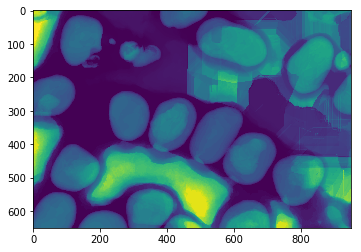

In [29]:
base_path = "/allen/aics/assay-dev/MicroscopyOtherData/Jianxu/Nucleus/segmentation/20181005_R01_003/archive/shape"
img_seg_all = skio.imread(os.path.join(base_path,seg_name))
img_seg_all[ 0,:,:] = 0
img_seg_all[-1,:,:] = 0
plt.imshow(img_seg_all.mean(axis=0))

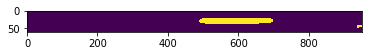

In [30]:
img_seg = img_seg_all.copy()
img_seg[img_seg!=cell_id] = 0
img_seg[img_seg==cell_id] = 1
plt.imshow(img_seg.max(axis=0))
plt.imshow(img_seg.max(axis=1))

In [31]:
print(img_seg.shape[0]*img_seg.shape[1]*img_seg.shape[2])
img_seg = label(img_seg)
print("#Comps:",np.unique(img_seg))
print("Sizes:",np.bincount(img_seg.flat,minlength=img_seg.max()))
largest_cc = 1 + np.argmax(np.bincount(img_seg.flat)[1:])
print("Largest CC:", largest_cc)

37050000
#Comps: [0 1 2 3 4]
Sizes: [36778818   271101       77        2        2]
Largest CC: 1


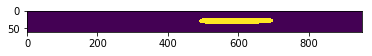

In [32]:
if img_seg.max() > 1:
    img_seg[img_seg!=largest_cc] = 0
    img_seg[img_seg>0] = 1
plt.imshow(img_seg.max(axis=0))
plt.imshow(img_seg.max(axis=1))

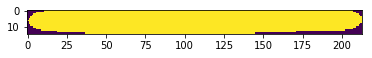

In [33]:
pxl_z, pxl_y, pxl_x = np.nonzero(img_seg)
img_seg_crop = img_seg[pxl_z.min():(pxl_z.max()+1),pxl_y.min():(pxl_y.max()+1),pxl_x.min():(pxl_x.max()+1)]
plt.imshow(img_seg_crop.max(axis=1))